#**CSE422 Project (Group_ 14)**

Members - >

Jawad Adit Chowdhury -22301138

Siam Abdullah -21301682

# Introduction

This project aims to figure out the variables responsible for and are potentially the cause of bank loan repayment delays. ((What will this solve?))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Analysis

In [ ]:
#MOUNT AND RUN
file = '/content/drive/MyDrive/CSE422Project/Loan_Assignment.xlsx - Sheet1.csv'

df = pd.read_csv(file)


In [ ]:
#CHECK
df.info
df.head()

,id,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,title,zip_code,dti,fico_range_low,tot_cur_bal,loan_status
0,68407277,3600,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,Not Verified,debt_consolidation,Debt consolidation,190xx,5.91,675.0,144904,Fully Paid
1,68355089,24700,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,Not Verified,small_business,Business,577xx,16.06,715.0,204396,Fully Paid
2,68341763,20000,60 months,10.78,432.66,10+ years,MORTGAGE,63000.0,Not Verified,home_improvement,NaN,605xx,10.78,695.0,189699,Fully Paid
3,66310712,35000,60 months,14.85,829.90,10+ years,MORTGAGE,110000.0,Source Verified,debt_consolidation,Debt consolidation,076xx,17.06,785.0,301500,Charged Off
4,68476807,10400,60 months,22.45,289.91,3 years,MORTGAGE,104433.0,Source Verified,major_purchase,Major purchase,174xx,25.37,695.0,331730,Fully Paid


In [ ]:
#CHECK NULLVAL
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2247 non-null   int64  
 1   loan_amnt            2247 non-null   int64  
 2   term                 2247 non-null   object 
 3   int_rate             2247 non-null   float64
 4   installment          2247 non-null   float64
 5   emp_length           2146 non-null   object 
 6   home_ownership       2247 non-null   object 
 7   annual_inc           2247 non-null   float64
 8   verification_status  2247 non-null   object 
 9   purpose              2247 non-null   object 
 10  title                2193 non-null   object 
 11  zip_code             2247 non-null   object 
 12  dti                  2247 non-null   float64
 13  fico_range_low       2243 non-null   float64
 14  tot_cur_bal          2247 non-null   int64  
 15  loan_status          2247 non-null   o

Null values found in emp_length, title and fico_range_low

In [ ]:
#DATASET
print("No of features in dataset:", df.shape[1])

print("No of data points: ",df.size)

print(set(df.dtypes))

No of features in dataset: 16
No of data points:  35952
{dtype('float64'), dtype('O'), dtype('int64')}


The dataset currently holds 35952 datapoints, and 16 features.

Since we're trying to predict the loan-status of a huge number of bank customers, there are 5 set outcomes


1.   Fully Paid
2.   Charged Off
3.   Late (31-120 days)
4. Late (16-30 days)
5. In Grace Period

Therefore, this is a classification problem.

And from the table generated above, it can be seen that there are features which are categorical and quantitative.



## Corelation of Numerical Features

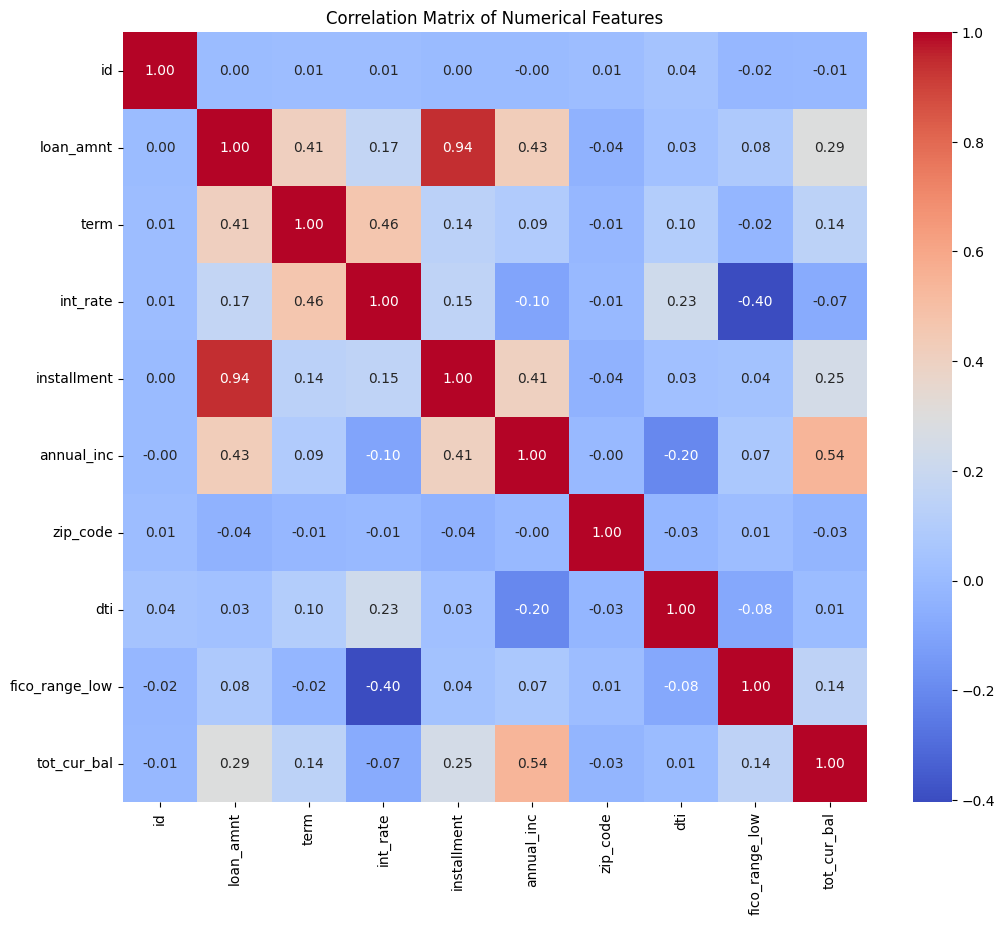

In [ ]:
# Convert 'term' column to numerical
df['term'] = df['term'].str.replace(' months', '').astype(int)
df['zip_code'] = df['zip_code'].astype(str).str.replace('xx', '', regex=False).astype(int)



# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()



## Dataset Imbalance

In [ ]:
#DATASETLOANIMBALANCE
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,1652
Charged Off,581
Late (31-120 days),11
In Grace Period,2
Late (16-30 days),1


<ipython-input-47-48f55d144fe2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette="Set2")


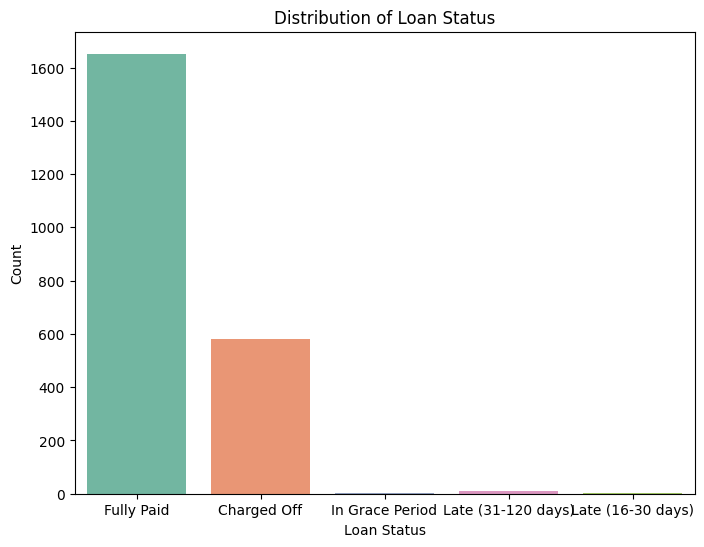

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df, palette="Set2")
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.savefig('class_distribution.png')
plt.show()


As it can be seen, the data is heavily imbalanced, with "Fully Paid" and "Charged Off" making up most of the data, with the rest being a miniscule amount (14/2247 entries)

# Data Preprocessing


In [ ]:
#FIND NULLVAL

df.isnull().sum()

,0
id,0
loan_amnt,0
term,0
int_rate,0
installment,0
emp_length,101
home_ownership,0
annual_inc,0
verification_status,0
purpose,0


It can be seen that emp_length and title have some null values.

## Filling in Null Values

In [ ]:
# NumMean
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

# CatMode
categorical_cols = df.select_dtypes(exclude=['number']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
#TEST

df.isnull().sum()

,0
id,0
loan_amnt,0
term,0
int_rate,0
installment,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0
purpose,0


##Removing Unnecessary Columns & Rows

In [ ]:
#DumpingCol
#ID Not Necessary - Title and Purpose more or less the same
df.drop(['id'], axis=1, inplace=True)
df.drop(['title'], axis=1, inplace=True)

df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
#Dropping the other stauses, because they're irrelevant, too miniscule to have an impact on the model. Even it it does have an impact, it'll only appear as noise, and reduce accuracy of the models.


Over here, the ID and Title columns were dropped since they're not necessary to the process. Title and Purpose more or less share the same data.

Rows containing statuses "Grace Period" and "Late" were dropped since they're a miniscule amount, needlessly complicates the process and therefore irrelevant to the training of the models.


##Encoding

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,fico_range_low,tot_cur_bal,loan_status
0,3600,36,13.99,123.03,10+ years,MORTGAGE,55000.0,Not Verified,debt_consolidation,190,5.91,675.0,144904,Fully Paid
1,24700,36,11.99,820.28,10+ years,MORTGAGE,65000.0,Not Verified,small_business,577,16.06,715.0,204396,Fully Paid
2,20000,60,10.78,432.66,10+ years,MORTGAGE,63000.0,Not Verified,home_improvement,605,10.78,695.0,189699,Fully Paid
3,35000,60,14.85,829.90,10+ years,MORTGAGE,110000.0,Source Verified,debt_consolidation,76,17.06,785.0,301500,Charged Off
4,10400,60,22.45,289.91,3 years,MORTGAGE,104433.0,Source Verified,major_purchase,174,25.37,695.0,331730,Fully Paid


In [ ]:
encodable_features = ['emp_length', 'home_ownership', 'verification_status', 'purpose', 'loan_status']

In [ ]:
for i in encodable_features:

  print(df[i].value_counts())
  print("==========")


emp_length
10+ years    890
< 1 year     206
3 years      202
2 years      199
1 year       142
4 years      129
5 years      129
8 years      105
6 years       84
9 years       80
7 years       67
Name: count, dtype: int64
home_ownership
MORTGAGE    1218
RENT         754
OWN          261
Name: count, dtype: int64
verification_status
Not Verified       870
Source Verified    769
Verified           594
Name: count, dtype: int64
purpose
debt_consolidation    1315
credit_card            535
home_improvement       128
other                  113
major_purchase          48
small_business          25
car                     23
medical                 17
vacation                12
house                    9
moving                   8
Name: count, dtype: int64
loan_status
Fully Paid     1652
Charged Off     581
Name: count, dtype: int64


As shown above, these variables have a fair number of categorical values, for these values to be effectively used to measure correlation, they have to be encoded as numerical values.

In [ ]:
#Handling Categorical Values
emp_map = {'< 1 year':0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}
df['emp_length'] = df['emp_length'].map(emp_map)

home_map = {'MORTGAGE': 0, 'RENT': 1, 'OWN': 2}
df['home_ownership'] = df['home_ownership'].map(home_map)
verification_map = {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}
df['verification_status'] = df['verification_status'].map(verification_map)
purpose_map = {'debt_consolidation': 0, 'credit_card': 1, 'home_improvement': 2, 'other': 3, 'major_purchase': 4, 'small_business': 5, 'car': 6, 'medical': 7,'vacation': 8, 'house': 9, 'moving': 10}
df['purpose'] = df['purpose'].map(purpose_map)
loan_map = {'Fully Paid': 1, 'Charged Off': 0}
df['loan_status'] = df['loan_status'].map(loan_map)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,fico_range_low,tot_cur_bal,loan_status
0,3600,36,13.99,123.03,10,0,55000.0,0,0,190,5.91,675.0,144904,1
1,24700,36,11.99,820.28,10,0,65000.0,0,5,577,16.06,715.0,204396,1
2,20000,60,10.78,432.66,10,0,63000.0,0,2,605,10.78,695.0,189699,1
3,35000,60,14.85,829.90,10,0,110000.0,1,0,76,17.06,785.0,301500,0
4,10400,60,22.45,289.91,3,0,104433.0,1,4,174,25.37,695.0,331730,1


##Balancing Dataset

As seen in the barchart above, the data is highly imbalanced, which might reduce the accuracy and precision of the models to be used. The dataset is too small to warrant a downscale, therefore hence, we will employ upscaling to balance the dataset. This involves generating synthetic samples for the minority class(Charged Off) until it matches the size of the majority class (Fully Paid).
[UPSCALED]

In [ ]:
#TEST UPSAMPLED
from sklearn.utils import resample

df_majority = df[df.loan_status == 1]
df_minority = df[df.loan_status == 0]

# Upsample the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Sample with replacement
                                 n_samples=len(df_majority),  # Match majority class size
                                 random_state=42)  # Set random state for reproducibility

# Combine upsampled minority and majority classes
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the balanced dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['loan_status'].value_counts())

df = df_balanced

loan_status
1    1652
0    1652
Name: count, dtype: int64


<ipython-input-58-48f55d144fe2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette="Set2")


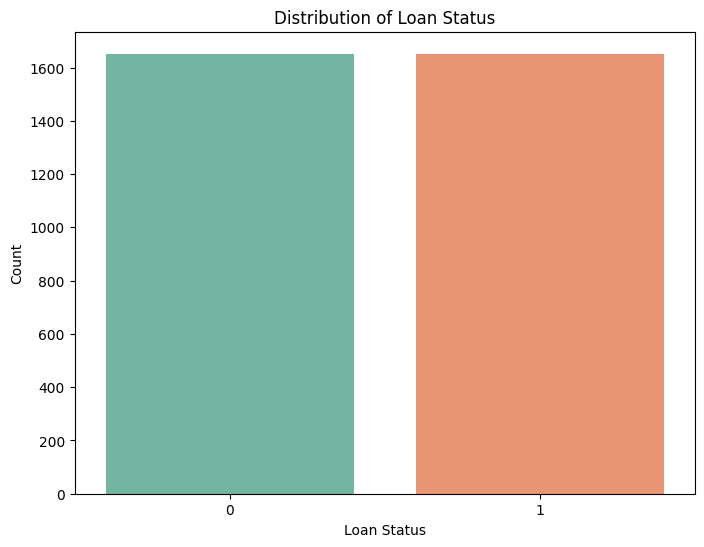

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df, palette="Set2")
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.savefig('class_distribution.png')
plt.show()


In [ ]:
#CHECK NULLVAL
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3304 entries, 0 to 3303
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            3304 non-null   int64  
 1   term                 3304 non-null   int64  
 2   int_rate             3304 non-null   float64
 3   installment          3304 non-null   float64
 4   emp_length           3304 non-null   int64  
 5   home_ownership       3304 non-null   int64  
 6   annual_inc           3304 non-null   float64
 7   verification_status  3304 non-null   int64  
 8   purpose              3304 non-null   int64  
 9   zip_code             3304 non-null   int64  
 10  dti                  3304 non-null   float64
 11  fico_range_low       3304 non-null   float64
 12  tot_cur_bal          3304 non-null   int64  
 13  loan_status          3304 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 361.5 KB


##Heatmap of Every Feature

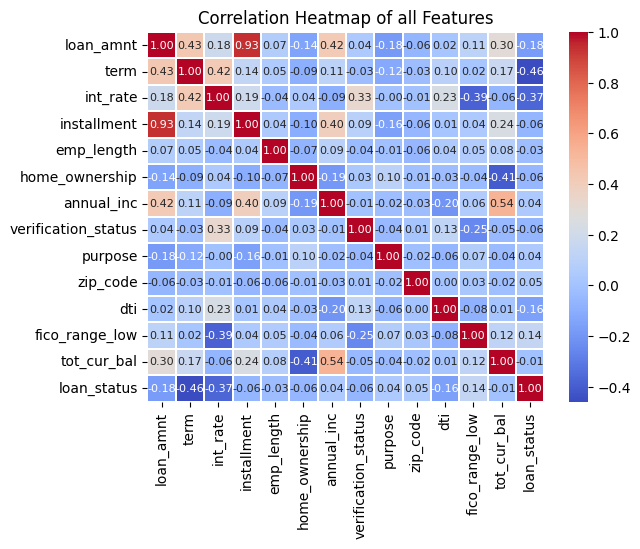

In [ ]:
  correlation_matrix = df.corr()

  sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm' , fmt = '.2f', linewidths = 0.1,annot_kws={'size': 8})
  plt.title('Correlation Heatmap of all Features')
  plt.show()

In [ ]:
correlation_matrix = df.corr()


loan_status_correlations = correlation_matrix['loan_status'].drop('loan_status')

# features closest to 0.0 for Depression
n_closest = 20  # Number of closest features to display
closest_features = loan_status_correlations.abs().nsmallest(n_closest).index.tolist()




print(f"\nFeatures with correlations closest to 0.0 with Depression:")
for feature in closest_features:
    print(feature, f"(Correlation: {loan_status_correlations[feature]:.20f})")


Features with correlations closest to 0.0 with Depression:
tot_cur_bal (Correlation: -0.00728596140839961066)
emp_length (Correlation: -0.03022548464122950737)
purpose (Correlation: 0.03908279098487425079)
annual_inc (Correlation: 0.04133446226354963587)
zip_code (Correlation: 0.05044915177763197034)
home_ownership (Correlation: -0.05834579361615875592)
verification_status (Correlation: -0.06095633145750627840)
installment (Correlation: -0.06346039632397126873)
fico_range_low (Correlation: 0.14103572807018827096)
dti (Correlation: -0.15712391440836326328)
loan_amnt (Correlation: -0.17734748841247721662)
int_rate (Correlation: -0.36844550313956780929)
term (Correlation: -0.45862378906662604194)


We can see that tot_cur_bal, annual_inc, emp_length, installment, verification_status, purpose, home_ownership, zip_code have a correlation close to zero. Therefore we'll drop them since they're most likely unimportant to predict loan status here.

In [ ]:
drop_fe =  ['tot_cur_bal', 'annual_inc', 'emp_length', 'installment', 'verification_status', 'purpose', 'home_ownership', 'zip_code']
df.drop(drop_fe, axis=1, inplace=True)

##Splitting+Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('loan_status', axis=1)
y = df['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train

,loan_amnt,term,int_rate,dti,fico_range_low
3217,8000,36,11.48,13.95,690.0
2335,11000,36,6.49,26.32,785.0
2476,14250,36,15.77,22.45,690.0
1703,18750,36,24.24,23.06,680.0
662,15000,60,13.44,18.17,670.0
...,...,...,...,...,...
1095,35000,60,10.78,21.24,735.0
1130,12000,36,9.80,13.46,705.0
1294,10000,36,9.17,28.09,710.0
860,18000,36,11.99,27.34,680.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['loan_amnt', 'term', 'int_rate', 'dti', 'fico_range_low']
scaler = MinMaxScaler()
x_train[numerical_features] = scaler.fit_transform(x_train[numerical_features])
x_test[numerical_features] = scaler.transform(x_test[numerical_features])
df[numerical_features] = scaler.transform(df[numerical_features])
x_train.head()

,loan_amnt,term,int_rate,dti,fico_range_low
3217,0.205882,0.0,0.265861,0.289062,0.162162
2335,0.294118,0.0,0.050496,0.557509,0.675676
2476,0.389706,0.0,0.451014,0.473524,0.162162
1703,0.522059,0.0,0.816573,0.486762,0.108108
662,0.411765,1.0,0.350453,0.380642,0.054054


#Model Training

In [ ]:
#KNearest KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)


In [ ]:
#Neural Network (MLP)
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
nn.fit(x_train, y_train)
y_pred_nn = nn.predict(x_test)


#Comparison Analysis

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_true, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Neural Network", y_test, y_pred_nn)


--- KNN ---
Accuracy: 0.7862903225806451
Precision: 0.7906530434602392
Recall: 0.7851220851037876
F1 Score: 0.7849608376449415
Confusion Matrix:
 [[429  76]
 [136 351]]
--- Logistic Regression ---
Accuracy: 0.7338709677419355
Precision: 0.7397732689477938
Recall: 0.7352105231056987
F1 Score: 0.7328938135413436
Confusion Matrix:
 [[334 171]
 [ 93 394]]
--- Neural Network ---
Accuracy: 0.7631048387096774
Precision: 0.763781482506553
Recall: 0.7635208490048184
F1 Score: 0.7630853378564466
Confusion Matrix:
 [[374 131]
 [104 383]]


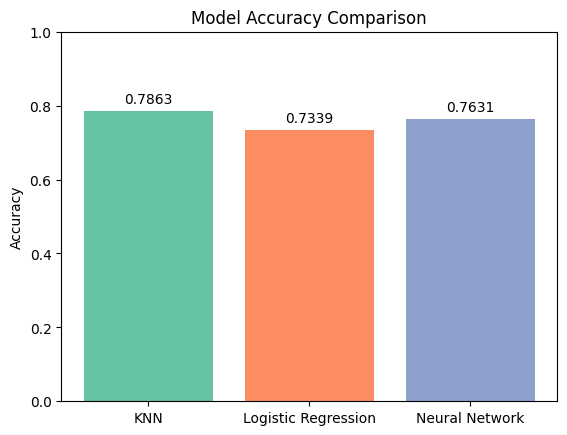

In [ ]:
accuracies = {
    'KNN': accuracy_score(y_test, y_pred_knn),
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Neural Network': accuracy_score(y_test, y_pred_nn)
}

colours = sns.color_palette('Set2', len(accuracies))


plt.bar(accuracies.keys(), accuracies.values(), color=colours)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.02, str(round(v, 4)), ha='center')

plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(


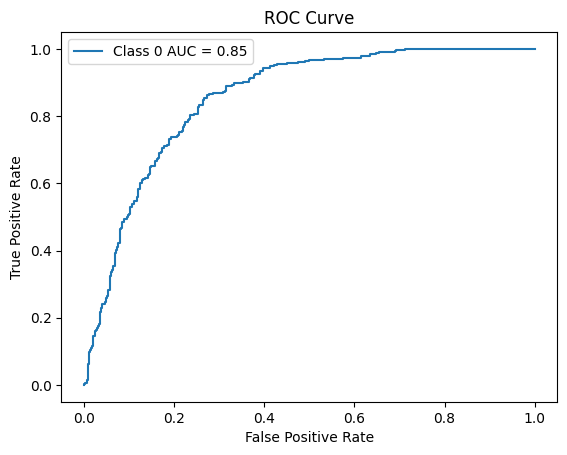

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

# Optional: scale your data for better NN/KNN performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# For Neural Network AUC example
nn_ovr = OneVsRestClassifier(MLPClassifier(max_iter=1000))
nn_ovr.fit(X_train_scaled, label_binarize(y_train, classes=[0,1,2,3,4]))
y_score = nn_ovr.predict_proba(X_test_scaled)

# Plot ROC for one class
fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=[0,1,2,3,4])[:,0], y_score[:,0])
plt.plot(fpr, tpr, label='Class 0 AUC = %0.2f' % auc(fpr, tpr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#Conclusion
1.
The results show that all three models have worked reasonably well, with KNN performing the best, followed by neutral network and logistic regression.
The AUC of 0.85 indicates that KNN has a strong ability to distinguish between the two classes(Fully Paid and Charged Off)

2.
KNN showed the best balance between precision and recall, which suggests that with proper scaling and balancing, the proximity-based classification has worked well.

Neural network meanwhile has performed close to KNN, demonstrating that it successfully learned non-linear patterns that this dataset represents.

Logistic Regression was the weakest performer, probably due to its limitations in capturing the complex relations between the data.

3.
These results were achieved due to

a. The removal of class bias through data balancing by upsampling, allowing models to learn both classes equally

b. Feature selection by removing variables with low correlation to the target as well classes with a negligible number of data helped improve focus, reducing noise.

4.
The challenges faced were in the form of

a. Class imbalance: Rare classes such as the two types of 'Late' and 'In Grace Period' skewed the model, Removing them and balancing the dataset resolved this.

b. Feature selection: Determining which features were meaningful required careful correlation analysis and judgment.